In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import minimize

Optimization

In [4]:
def f(x):
  return (x-3)**2

res= minimize(f,2)

In [5]:
res.x

array([2.99999999])

In [6]:
f= lambda x:(x[0]-1)**2  + (x[1]-2.5)**2
cons= ({'type': 'ineq', 'fun': lambda x:x[0]-2*x[1]+2},
       {'type': 'ineq', 'fun': lambda x:-x[0]-2*x[1]+6},
       {'type': 'ineq', 'fun': lambda x:x[0]+2*x[1]+2})
bnds= ((0, None),(0, None))
res= minimize(f,(2,0), bounds=bnds, constraints= cons)

In [7]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

In [8]:
res.x

array([1.4, 1.7])

Interpolation

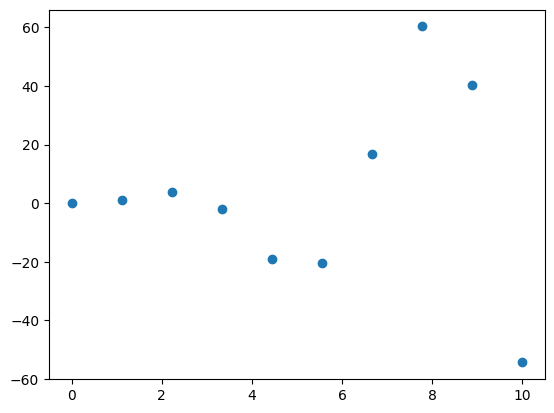

In [9]:
x= np.linspace(0,10,10)
y= x**2*np.sin(x)
plt.scatter(x,y)

In [10]:
from scipy.interpolate import interp1d

In [11]:
f= interp1d(x, y, kind= 'cubic')
x_dense= np.linspace(0,10,100)
y_dense=f(x_dense)

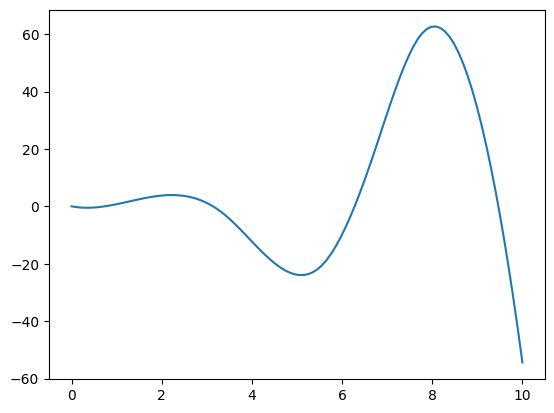

In [12]:
plt.plot(x_dense, y_dense)

Curve Fitting

In [13]:
x_data= np.linspace(0,10,10)
y_data= 3*x_data**2+2

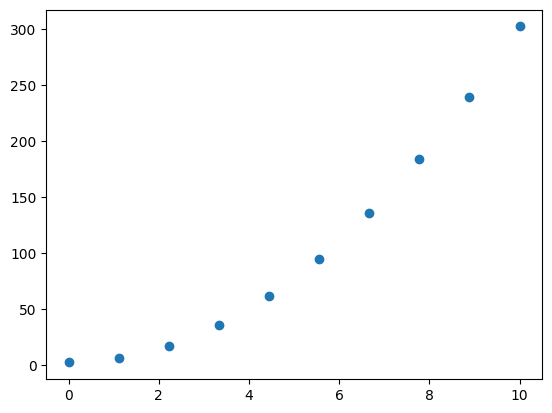

In [14]:
plt.scatter(x_data, y_data)

In [15]:
from scipy.optimize import curve_fit

def func(x,a,b):
  return a*x**2+b

popt, pcov= curve_fit(func, x_data, y_data, p0=(1,1))

In [16]:
popt

array([3., 2.])

Example: Physics. The equation for motion is y(t)= Acos(omega*t+ phi). Want to find the natural frequency of oscillation omega for the spring. You collect the data

In [17]:
t_data= np.arange(0,10,.34483759)
y_data= 4.33*np.cos(np.pi*np.arange(0,10, .34483759))
y_data

array([ 4.33      ,  2.02808832, -2.43016526, -4.3045732 , -1.60219253,
        2.80370116,  4.22859141,  1.15747982, -3.14430905, -4.102947  ,
       -0.69917311,  3.44798866,  3.92911561,  0.23265498, -3.71117342,
       -3.70913879,  0.23659557,  3.93077238,  3.44560006, -0.70306743,
       -4.10420645, -3.14159453,  1.16128212,  4.22943874,  2.80069261,
       -1.60585816, -4.30499846, -2.426898  ,  2.03157422])

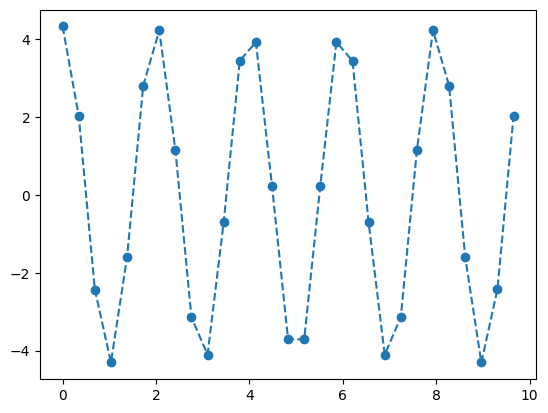

In [18]:
plt.plot(t_data, y_data, 'o--')

Note by Guessing, A = 4, omega = pi, and phi=0

In [19]:
def func(x,A,w,phi):
  return A*np.cos(w*x+phi)

popt, pcov= curve_fit(func, t_data, y_data, p0=(4,np.pi, 0))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [20]:
A,w, phi = popt

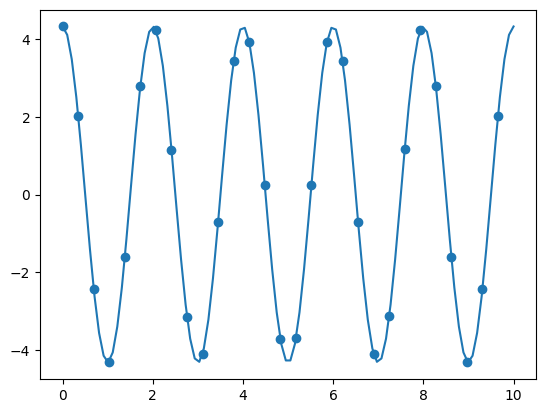

In [21]:
t= np.linspace(0,10,100)
y=func(t,A,w,phi)
plt.scatter(t_data,y_data)
plt.plot(t,y)

Calculus

In [22]:
from scipy.misc import derivative

In [23]:
def f(x):
  return x**2*np.sin(2*x)*np.exp(-x)
x= np.linspace(0,1,100)

In [24]:
dydx= derivative(f, x, dx=1e-6)

<ipython-input-24-3c9e1ef03000>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx= derivative(f, x, dx=1e-6)


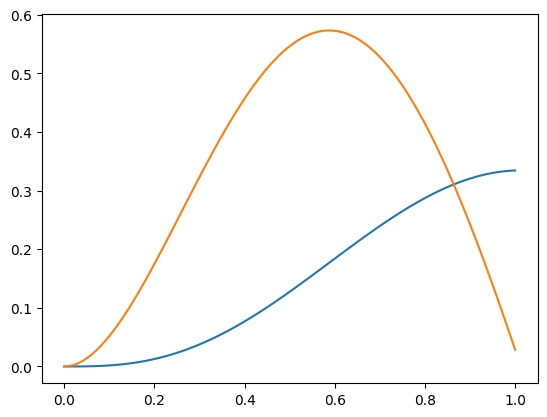

In [25]:
plt.plot(x, f(x))
plt.plot(x,dydx)

In [26]:
from scipy.integrate import quad
integrand= lambda x:x**2*np.sin(2*x)*np.exp(-x)
integral, integeral_error= quad(integrand,0,1)

In [27]:
integral

0.14558175869954834

In [28]:
integeral_error

1.6162822047366225e-15

The error is practically 0, which means this is a great approximation

In [29]:
from scipy.integrate import dblquad
integrand= lambda x,y: np.sin(x+y**2)
lwr_y= lambda x: -x
upr_y= lambda x: x**2
integral, integeral_error= dblquad(integrand,0,1,lwr_y,upr_y)

In [30]:
integral

0.315802507240474

In [31]:
integeral_error

1.5634600713498928e-14

Very low error, so this is an excellent approximation of the double integral

Starting Matplotlib Section here.There is more Scipy things. But not necessarily useful for me (if you're a Physics major, then I would heavily
consider going deeper)

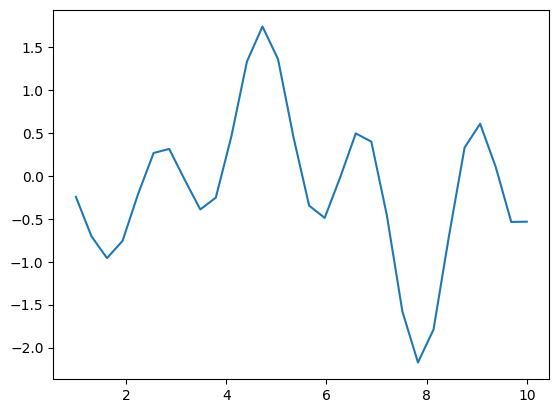

In [32]:
n=30
x=np.linspace(1,10,n)
y= np.sin(x)*np.log(x+1)*np.cos(2*x)
plt.plot(x,y)

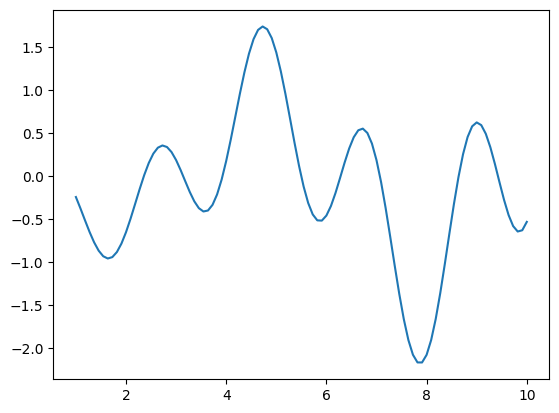

In [33]:
n=100
x=np.linspace(1,10,n)
y= np.sin(x)*np.log(x+1)*np.cos(2*x)
plt.plot(x,y)

realize that the higher n is... the smoother the graph becomes

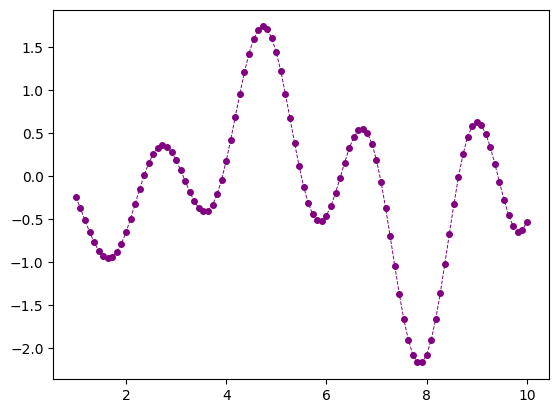

In [34]:
n=100
x=np.linspace(1,10,n)
y= np.sin(x)*np.log(x+1)*np.cos(2*x)
plt.plot(x,y, 'o--', color= 'purple', lw=.7, ms= 4)

lw= line width, ms= marker size, color gives color

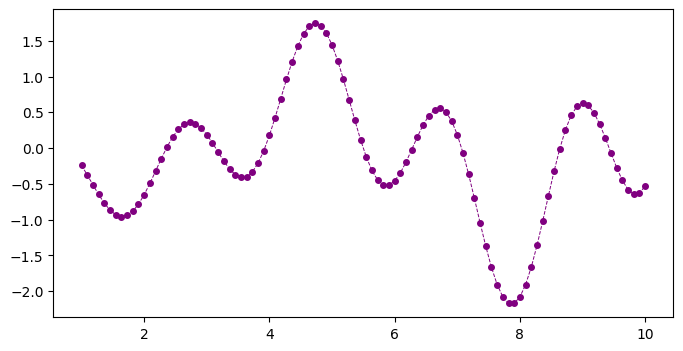

In [35]:
plt.figure(figsize=(8,4))
plt.plot(x,y, 'o--', color= 'purple', lw=.7, ms= 4)


figsize changes the picture frame.

Text(0.5, 0, 'Time [s]')

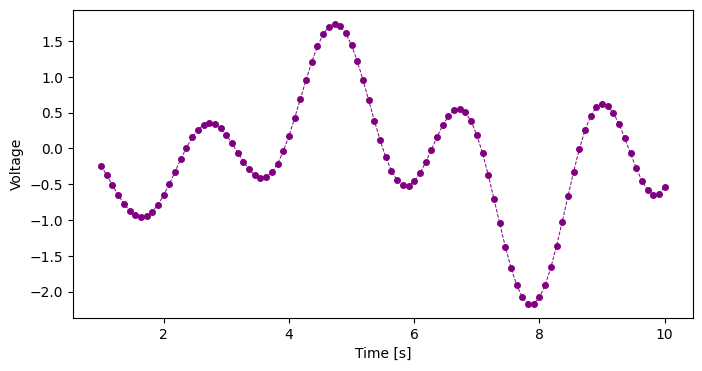

In [36]:
plt.figure(figsize=(8,4))
plt.plot(x,y, 'o--', color= 'purple', lw=.7, ms= 4)
plt.ylabel('Voltage')
plt.xlabel('Time [s]')

Text(0.5, 1.0, 'Randomness')

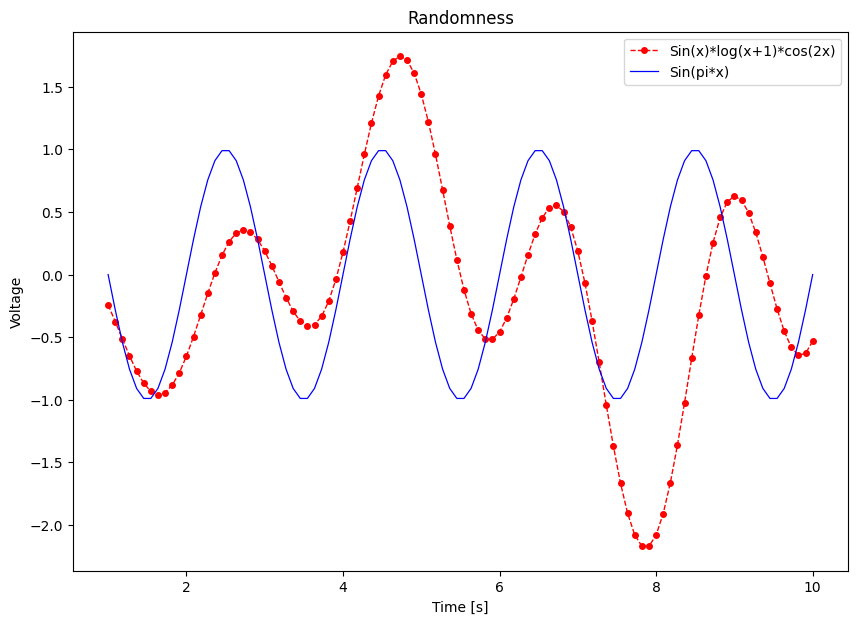

In [37]:
y2= np.sin(np.pi*x)
n=1000

plt.figure(figsize=(10,7))
plt.plot(x,y, 'o--', color= 'red', lw=1, ms= 4 ,label= 'Sin(x)*log(x+1)*cos(2x)')
plt.plot(x,y2,'-', color= 'blue', lw=.9, ms=3, label= 'Sin(pi*x)')
plt.ylabel('Voltage')
plt.xlabel('Time [s]')
plt.legend()
plt.title('Randomness')

Just made a random graph using all the things, we learned so far

Text(0.5, 1.0, 'Randomness')

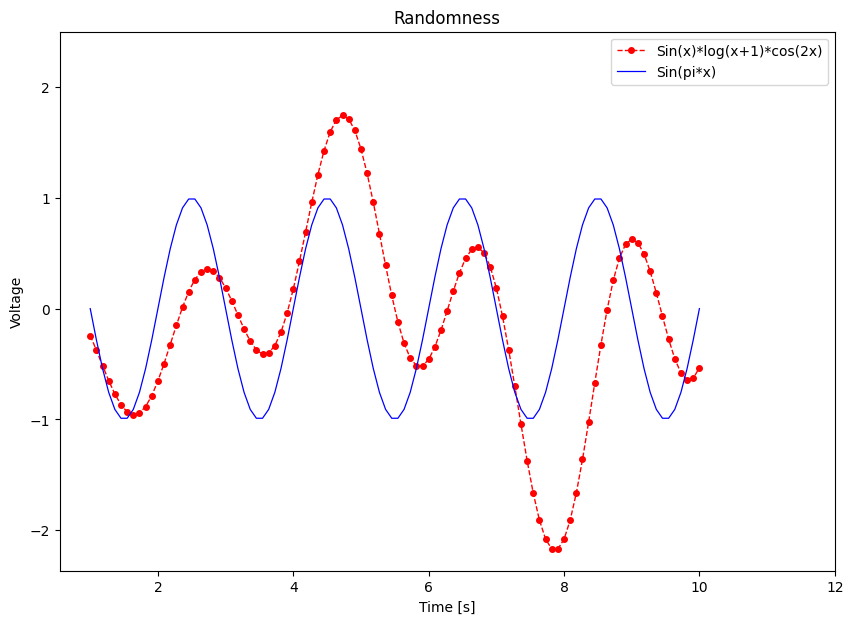

In [38]:
plt.figure(figsize=(10,7))
plt.plot(x,y, 'o--', color= 'red', lw=1, ms= 4 ,label= 'Sin(x)*log(x+1)*cos(2x)')
plt.plot(x,y2,'-', color= 'blue', lw=.9, ms=3, label= 'Sin(pi*x)')
plt.ylabel('Voltage')
plt.ylim(top=2.5)
plt.xlim(right=12)
plt.xlabel('Time [s]')
plt.legend()
plt.title('Randomness')

xlim and ylim are used to changed the size perspective of the "window size" of the graph. xlim has (right and left) and ylim has (bottom and top)

Histograms

In [48]:
res= np.random.randn(1000)*.2+.04
res

array([-4.44610460e-02, -8.02700185e-02,  2.68705516e-01, -1.70308160e-01,
       -1.04350398e-01, -2.14753012e-01,  9.87043186e-02, -3.05612328e-01,
        8.46621512e-02, -2.52032881e-01,  8.34065709e-02,  7.45505671e-02,
       -1.41898844e-01,  2.13797343e-01,  3.77329365e-01,  8.73898668e-02,
        6.95048859e-02,  1.61512166e-02,  1.17102359e-01,  2.32315983e-01,
       -1.33743759e-03, -5.07775160e-02,  2.78681818e-01, -1.55313775e-01,
       -2.89196671e-01, -2.28217458e-02,  2.18896171e-01, -3.00775143e-02,
       -1.60811492e-01, -2.26462997e-01,  1.18801699e-01, -1.61589968e-01,
       -2.35618144e-01, -1.31234908e-01,  5.45329629e-01, -1.71217276e-01,
        1.41446760e-01, -7.28022137e-03, -1.32466088e-01,  1.04834347e-01,
       -6.11809466e-02,  3.37736693e-01,  1.04126943e-01, -3.31680352e-02,
       -1.32867813e-01,  1.03917944e-01,  3.79791975e-01,  5.78247102e-01,
        2.69950888e-01, -8.03461823e-02, -2.85876147e-01,  8.65775565e-02,
       -3.82930104e-02, -

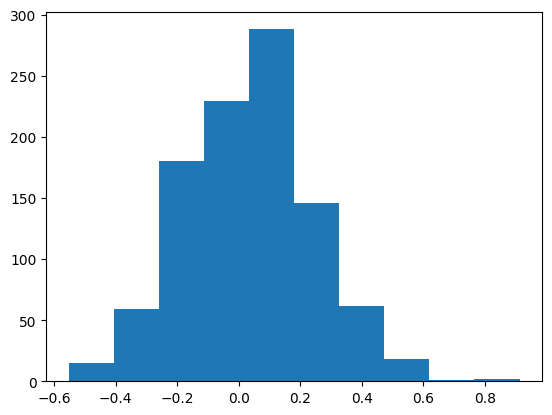

In [49]:
a=plt.hist(res)

In [50]:
##extracting the array of the histogram
a

(array([ 15.,  59., 180., 229., 288., 146.,  62.,  18.,   1.,   2.]),
 array([-0.55267149, -0.40611696, -0.25956243, -0.11300791,  0.03354662,
         0.18010115,  0.32665568,  0.4732102 ,  0.61976473,  0.76631926,
         0.91287379]),
 <BarContainer object of 10 artists>)

Adding bins to histogram

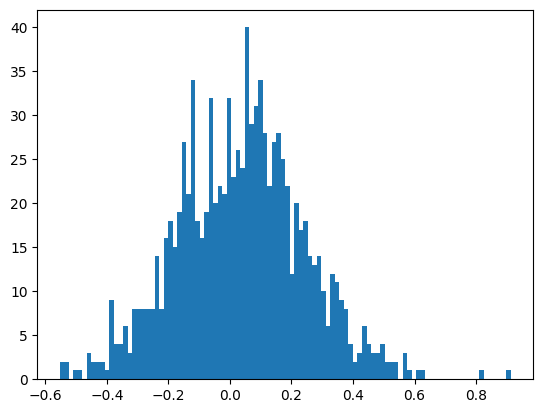

In [51]:
b= plt.hist(res, bins=100)

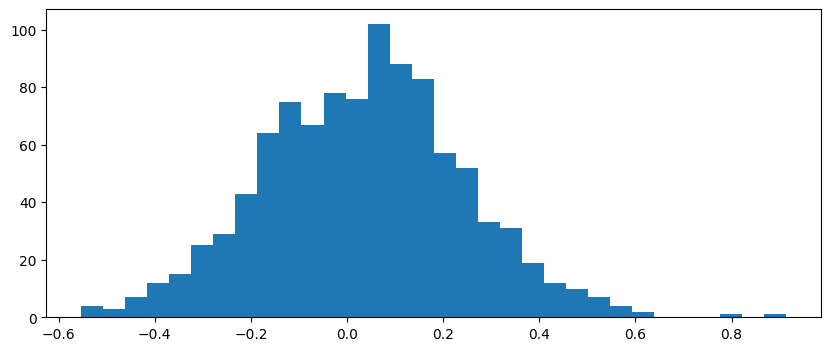

In [54]:
plt.figure(figsize=(10,4))
c= plt.hist(res, bins=32)

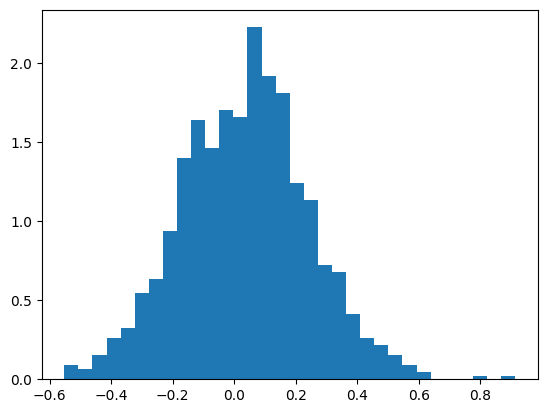

In [56]:
## Normalizating a Histogram
d= plt.hist(res, bins=32, density= True)

(array([  4.,   3.,   7.,  12.,  15.,  25.,  29.,  43.,  64.,  75.,  67.,
         78.,  76., 102.,  88.,  83.,  57.,  52.,  33.,  31.,  19.,  12.,
         10.,   7.,   4.,   2.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.55267149, -0.5068732 , -0.46107491, -0.41527662, -0.36947833,
        -0.32368004, -0.27788175, -0.23208346, -0.18628517, -0.14048688,
        -0.09468859, -0.0488903 , -0.00309201,  0.04270628,  0.08850457,
         0.13430286,  0.18010115,  0.22589944,  0.27169773,  0.31749602,
         0.36329431,  0.4090926 ,  0.45489089,  0.50068918,  0.54648747,
         0.59228576,  0.63808405,  0.68388234,  0.72968063,  0.77547892,
         0.82127721,  0.8670755 ,  0.91287379]),
 <BarContainer object of 32 artists>)

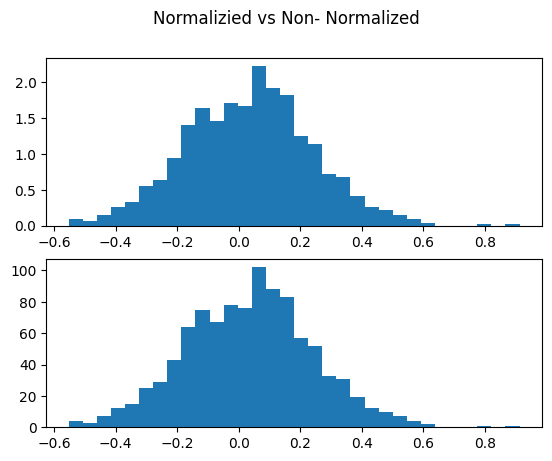

In [58]:
## making a subplot to show difference in normalization
fig, axes= plt.subplots(2)
fig.suptitle('Normalizied vs Non- Normalized')
axes[0].hist(res, bins=32, density= True)
axes[1].hist(res, bins=32)

Overlapping histogram

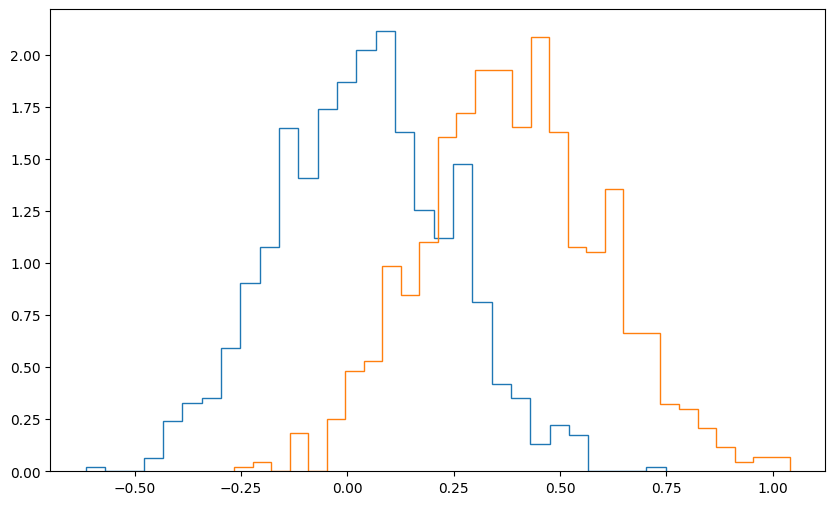

In [59]:
res2= np.random.randn(1000)*.2+.4
res=np.random.randn(1000)*.2+.04

plt.figure(figsize= (10,6))
plt.hist(res, bins=30, density= True, histtype='step')
plt.hist(res2, bins=30, density= True, histtype='step')
plt.show()


More advanced coding

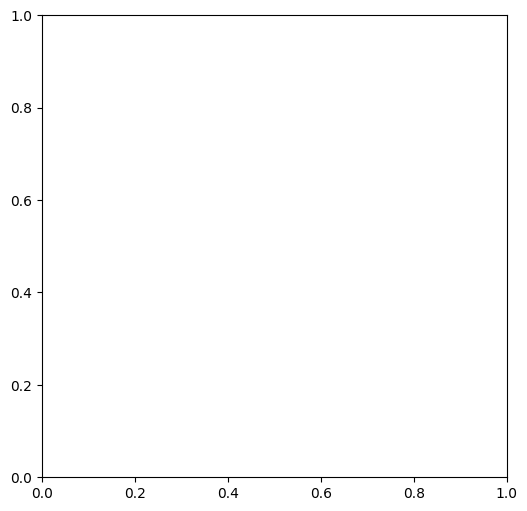

In [61]:
fig, ax= plt.subplots(1,1, figsize=(6,6))

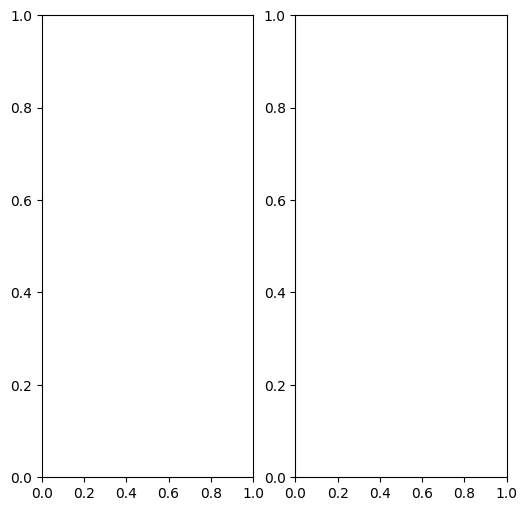

In [62]:
## makes multiple plots
fig, ax= plt.subplots(1,2, figsize=(6,6))

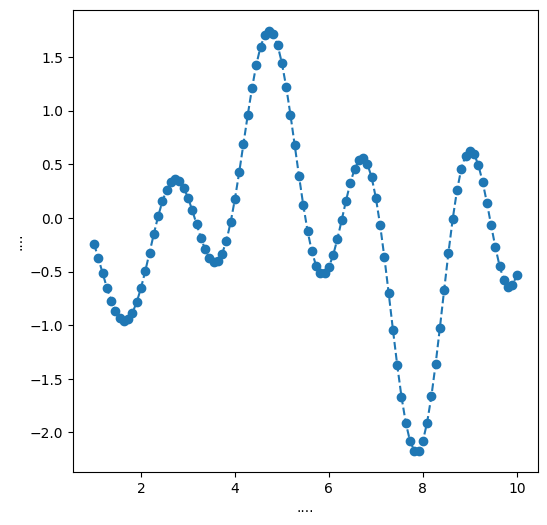

In [63]:
fig, ax= plt.subplots(1,1, figsize=(6,6))
ax.plot(x,y, 'o--')
ax.set_xlabel("....")
ax.set_ylabel('....')
plt.show()

Multiple axes in 1 figure

(array([0.02199914, 0.        , 0.        , 0.06599742, 0.24199052,
        0.32998708, 0.35198621, 0.59397674, 0.90196467, 1.07795778,
        1.64993538, 1.40794486, 1.73793193, 1.86992676, 2.02392073,
        2.11191728, 1.62793624, 1.25395089, 1.12195606, 1.47394227,
        0.81396812, 0.41798363, 0.35198621, 0.13199483, 0.21999138,
        0.17599311, 0.        , 0.        , 0.        , 0.02199914]),
 array([-0.61548663, -0.5700303 , -0.52457398, -0.47911765, -0.43366133,
        -0.388205  , -0.34274868, -0.29729235, -0.25183602, -0.2063797 ,
        -0.16092337, -0.11546705, -0.07001072, -0.02455439,  0.02090193,
         0.06635826,  0.11181458,  0.15727091,  0.20272723,  0.24818356,
         0.29363989,  0.33909621,  0.38455254,  0.43000886,  0.47546519,
         0.52092151,  0.56637784,  0.61183417,  0.65729049,  0.70274682,
         0.74820314]),
 <BarContainer object of 30 artists>)

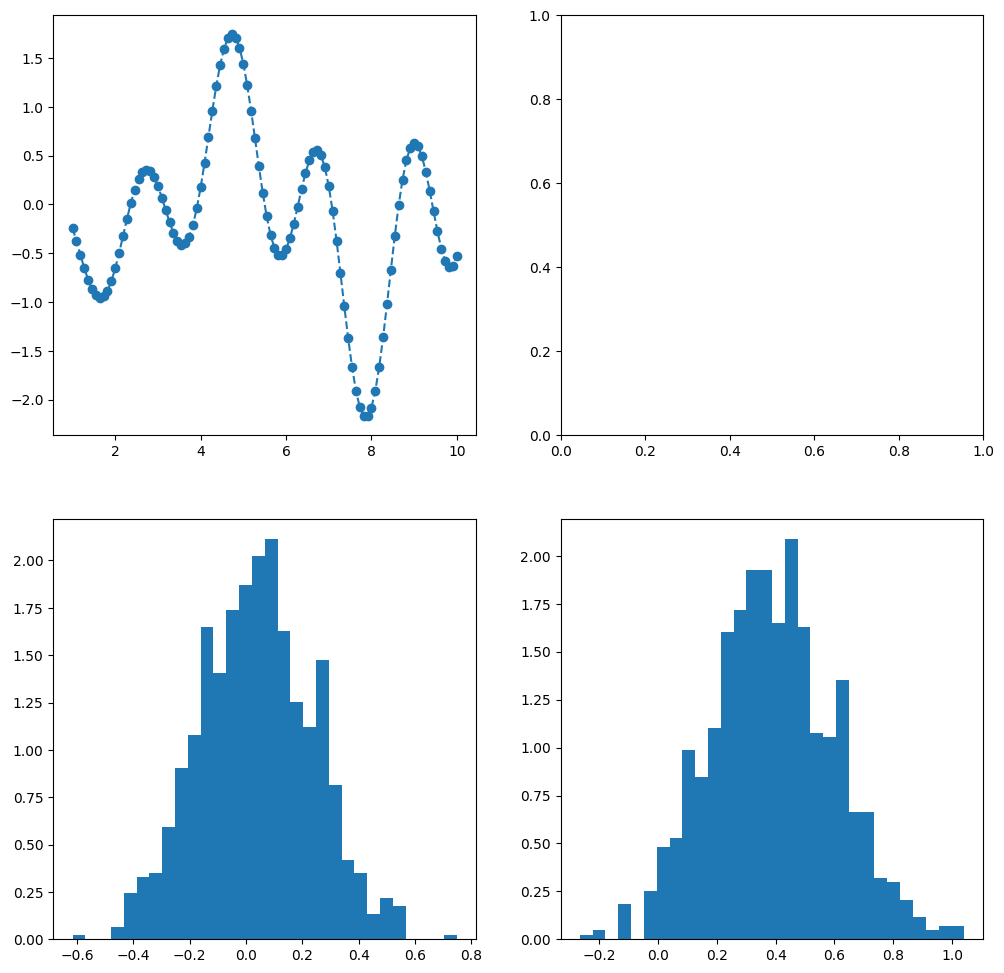

In [68]:
fig, axes= plt.subplots(2,2, figsize=(12,12))
ax= axes[0][0]
ax.plot(x,y, 'o--')
ax= axes[1][1]
ax.hist(res2, bins= 30, density= True)
ax= axes[1][0]
ax.hist(res, bins=30, density= True )